# This notebook demos varios differential operators

We start with our differential operators

In [1]:
from dusk.script import *


@stencil
def gradient(f: Field[Edge], nx: Field[Edge], ny: Field[Edge], L: Field[Edge], A: Field[Cell], edge_orientation: Field[Cell > Edge], 
                f_x: Field[Cell], f_y: Field[Cell]):
  with levels_downward:
    f_x = sum_over(Cell > Edge, f * nx * L * edge_orientation) / A
    f_y = sum_over(Cell > Edge, f * ny * L * edge_orientation) / A

@stencil
def divergence(u: Field[Edge], v: Field[Edge], nx: Field[Edge], ny: Field[Edge], L: Field[Edge], A: Field[Cell], edge_orientation: Field[Cell > Edge],
                  uv_div: Field[Cell]):
  with levels_downward:
    uv_div = sum_over(Cell > Edge, (u*nx + v*ny) * L * edge_orientation) / A

@stencil
def curl(u: Field[Edge], v: Field[Edge], nx: Field[Edge], ny: Field[Edge], dualL: Field[Edge], dualA: Field[Vertex], edge_orientation: Field[Vertex > Edge],
            uv_curl: Field[Vertex]):
  with levels_downward:
    uv_curl = sum_over(Vertex > Edge, (u*nx + v*ny) * dualL * edge_orientation) / dualA 

Then we can use dusk's Python API to convert the stencils to SIR. This API can also invoke dawn to compile SIR to C++:

In [2]:
from dusk.transpile import callables_to_pyast, pyast_to_sir, sir_to_cpp

with open("diff_ops_cxx-naive.cpp", "w+") as f:
    f.write(sir_to_cpp(pyast_to_sir(callables_to_pyast([gradient, divergence, curl]))))

The generated C++ code also requires a driver which is already setup for this demo. With the driver code we can generate an executable `runner`:

In [3]:
!make

Now, its up to you which differentail operator you want to run and check. Simply launch `runner gradient`, `runner divergence` or `runner curl`

In [4]:
!./runner curl

mesh stats: #cells 1760 #nodes 940 #edges 2699
curl_uv L1: 0.001434, L2: 0.001863, Linf: 0.004384


Besides ensuring the error norms L1, L2 and L infinity are small (they should all be well below 0.1), you can also have a look at some test functions and their differentials. Again, you can use `check gradient`, `check divergence` or `check curl`. Please make sure that you ran the appropriate differential operator beforhand using the `runner`

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-26kr2suw because the default path (/home/jovyan/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


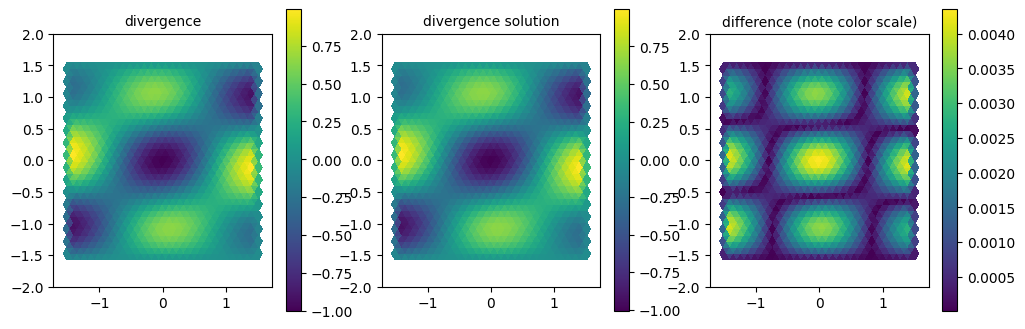

In [5]:
%run checker.py curl